<div class="alert alert-block alert-success">
    
# FIT5196 Task 3 in Assessment 1
#### Student Name: Michael Xie
#### Student ID: 31842819

Date: 24/08/2024


Environment: Python 3.11.9

Libraries used:
* xxxxx
* xxxxx
    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Examining Raw Data(given input file from task1)](#examine1) <br>
[4. Examining metadata](#examine2) <br>
[5. Data Analysis](#DA) <br>
    - [5.1 Question 1: How is xxxx related to xxxx?](#DI1) <br>
    - [5.2 Question 2: How does xxxxxx impact the rating of a business?](#DI2) <br>
[6. Summary](#summary) <br>
[7. References](#Ref) <br>

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

The following report aims to explore and uncover interesting insights regarding google reviews in California between 2008 and 2021. The report features an EDA on a range of pre-processed datasets from task 1 and 2 in addition to the provided auxiliary metadata dataset. 

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div> 

The packages to be used in this assessment are imported in the following. They are used to fulfill the following tasks:

* **re:** to define and use regular expressions
* **pandas:** to manipulate and transform data
* **numpy:** to initialise Null values 
* **seaborn:** to generate graphs and other visualisations
* **matplotlib.pyplot:** also used to generate visualisations 
* **folium:** used to generate map 
* **branca.colormap, linear:** used to generate continious colour scheme 
* **collections:, defaultdict** to intialise default dictionaries

In [443]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import folium
from branca.colormap import linear
from collections import defaultdict

<div class="alert alert-block alert-warning">

## 3.  Examining Raw Data(given input file from task1) <a class="anchor" name="examine1"></a>

 </div>

## Task 1 Review Data 

In [444]:
# Intialise Data 
review_df = pd.read_excel(r"combined_data.xlsx")
review_df.head()


,gmap_id,user_id,time,review_rating,review_text,if_pic,pic_dim,if_response
0,0x80c2b62d3ad1385f:0x134c0ae51a64e340,111879057746007898782,2019-02-07 18:49:08,4,"my ""expert foodie friends"" have been telling m...",N,[],N
1,0x80c2b62d3ad1385f:0x134c0ae51a64e340,101905598065020101585,2018-09-20 20:07:00,4,beautiful atmosphere. great food and amazing s...,N,[],N
2,0x80c2b62d3ad1385f:0x134c0ae51a64e340,107641378831752487602,2019-01-20 06:51:19,4,love how hidden this joint was in downtown los...,N,[],N
3,0x80c2b62d3ad1385f:0x134c0ae51a64e340,106296655996491216483,2019-01-21 06:14:42,5,one of my favorite spots for delicious seafood...,N,[],N
4,0x80c2b62d3ad1385f:0x134c0ae51a64e340,114797512876374566333,2019-02-12 00:16:22,5,seafood and the atmosphere here is quality. fo...,N,[],N


In [445]:
review_df.shape

(36598, 8)

In [446]:
review_df.columns

Index(['gmap_id', 'user_id', 'time', 'review_rating', 'review_text', 'if_pic',
       'pic_dim', 'if_response'],
      dtype='object')

In [447]:
review_df.dtypes

gmap_id          object
user_id          object
time             object
review_rating     int64
review_text      object
if_pic           object
pic_dim          object
if_response      object
dtype: object

From here we see that time has been converted to an object during file type conversion. We will convert this back in order for easier transformations and filtering future analysis.

In [448]:
# Transform time to datetime object
review_df['time'] = pd.to_datetime(review_df['time'])

In [449]:
review_df.head()

,gmap_id,user_id,time,review_rating,review_text,if_pic,pic_dim,if_response
0,0x80c2b62d3ad1385f:0x134c0ae51a64e340,111879057746007898782,2019-02-07 18:49:08,4,"my ""expert foodie friends"" have been telling m...",N,[],N
1,0x80c2b62d3ad1385f:0x134c0ae51a64e340,101905598065020101585,2018-09-20 20:07:00,4,beautiful atmosphere. great food and amazing s...,N,[],N
2,0x80c2b62d3ad1385f:0x134c0ae51a64e340,107641378831752487602,2019-01-20 06:51:19,4,love how hidden this joint was in downtown los...,N,[],N
3,0x80c2b62d3ad1385f:0x134c0ae51a64e340,106296655996491216483,2019-01-21 06:14:42,5,one of my favorite spots for delicious seafood...,N,[],N
4,0x80c2b62d3ad1385f:0x134c0ae51a64e340,114797512876374566333,2019-02-12 00:16:22,5,seafood and the atmosphere here is quality. fo...,N,[],N


In [450]:
# Generate summary statistics 
review_df.describe(include='all')

,gmap_id,user_id,time,review_rating,review_text,if_pic,pic_dim,if_response
count,36598,36598,36598,36598.000000,36575,36598,36598,36598
unique,176,35715,NaN,NaN,19739,2,24,2
top,0x80dd31941bd88101:0x24ef065e89051282,116535190851168531218,NaN,NaN,none,N,[],N
freq,1880,4,NaN,NaN,15438,34456,35724,32170
mean,NaN,NaN,2019-03-21 02:03:16.971692288,4.364118,NaN,NaN,NaN,NaN
min,NaN,NaN,2008-02-05 13:00:44,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2018-05-27 09:20:56.750000128,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,2019-05-12 12:32:01.500000,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020-03-06 05:35:07.750000128,5.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,2021-08-25 16:57:30,5.000000,NaN,NaN,NaN,NaN


In [451]:
# Check for missing values 
review_df.isnull().sum()

gmap_id           0
user_id           0
time              0
review_rating     0
review_text      23
if_pic            0
pic_dim           0
if_response       0
dtype: int64

*Note that many columns containing blank values were assigned 'None' from task 1 which won't be picked up here. Also, the 23 null values in review_text we can safely assume are empty strings after pre-processing process from task 1.*

### **2. Summarize Key Features and Variables:**

- **gmap_id**: Unique identifier for each business
- **user_id**: Unique identifier for each user
- **time**: Timestamp of when the review was submitted in format 'YYYY-MM-DD tt:hh:ss' - ranges from 2008 to 2021
- **review_rating**: Integer review rating between 1-5 
- **review_text**: Preprocessed body of review ('None' if no review text)
- **if_pic**: Boolean (Y/N) indicator for whether user has submitted pictures. 
- **pic_dim**: List of picture dimensions ('[]' if no picture)
- **if_response**: Boolean (Y/N) indicator showing if there was a response to the review from the business.


### **Visualisations:**

### Reviews over time 

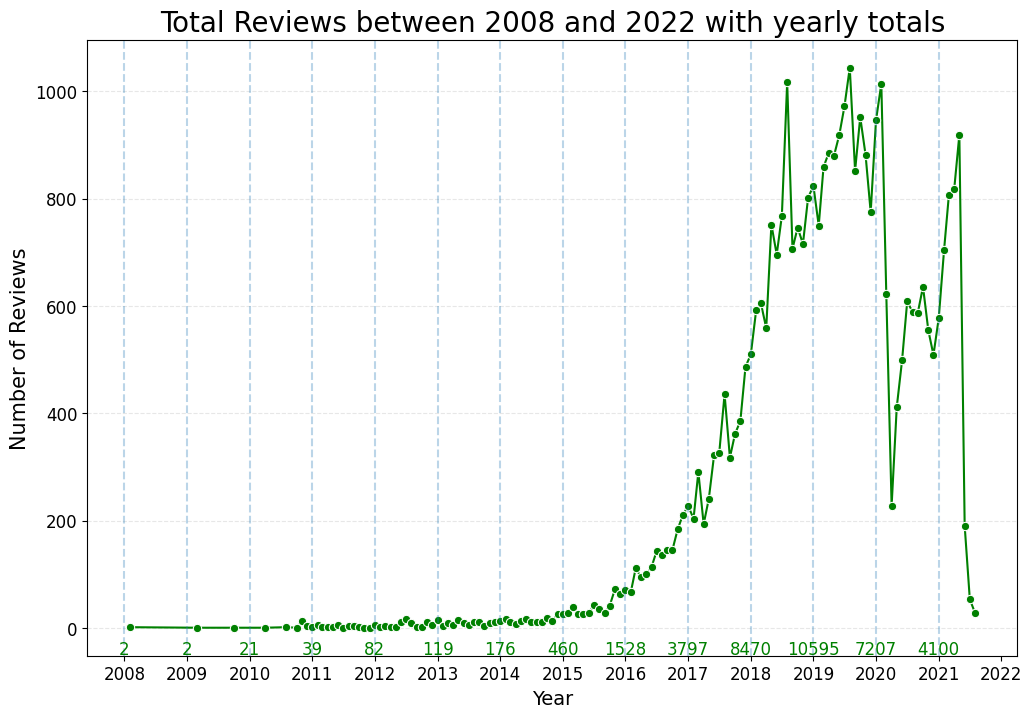

In [452]:
# Extract year and month for aggregation 
review_df['year'] = review_df['time'].dt.year
review_df['month'] = review_df['time'].dt.to_period('M').astype(str)  

# Calculate monthly reviewss
monthly_reviews = review_df.groupby('month').size().reset_index(name='monthly_reviews')

# Add year for display purposes 
monthly_reviews['month'] = pd.to_datetime(monthly_reviews['month'], format='%Y-%m')

# Calculate position_yly reviews
yearly_reviews = review_df.groupby('year').size().reset_index(name='yearly_reviews')


# Generate line graph 
plt.figure(figsize=(12, 8))
sns.lineplot(data=monthly_reviews, x='month', y='monthly_reviews', marker='o', color='green')

# Generate position_yly total labels 
for index, row in yearly_reviews.iterrows():
    # Intialise month and day to 1 to display at beginning of Year   
    position_x = pd.to_datetime(f'{row["year"]}-01-01')

    # Vertical position for position_y total labels 
    position_y = monthly_reviews['monthly_reviews'].min() -50
    
    plt.text(position_x, position_y, f'{row["yearly_reviews"]}', color='green', ha='center', fontsize=12)
    # Add axis lines 
    plt.axvline(x=position_x, linestyle='--', alpha=0.3)
    
# Generate yearly x ticks 
years = [str(year) for year in range(2008, 2023)]
years_dt = pd.to_datetime(years)
plt.xticks(years_dt, years, fontsize=12)

plt.yticks(fontsize=12)
plt.title('Total Reviews between 2008 and 2022 with yearly totals', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


Assuming that our assigned review data contains a subset of reviews reflective of the overall review landscape of California between 2008 and 2022:
Here we can see that google reviews in California started slow with only a total of 4 reviews in 2008 and 2009. Reviews only started to become popular after 2015 when there was an exponential growth in activity. We can also notice a significant drop in reviews after 2019, this could likely reflect the large-scale effects of the Covid-19 pandemic which encouraged people to stay at home. 

### Business responses based on Review Rating 

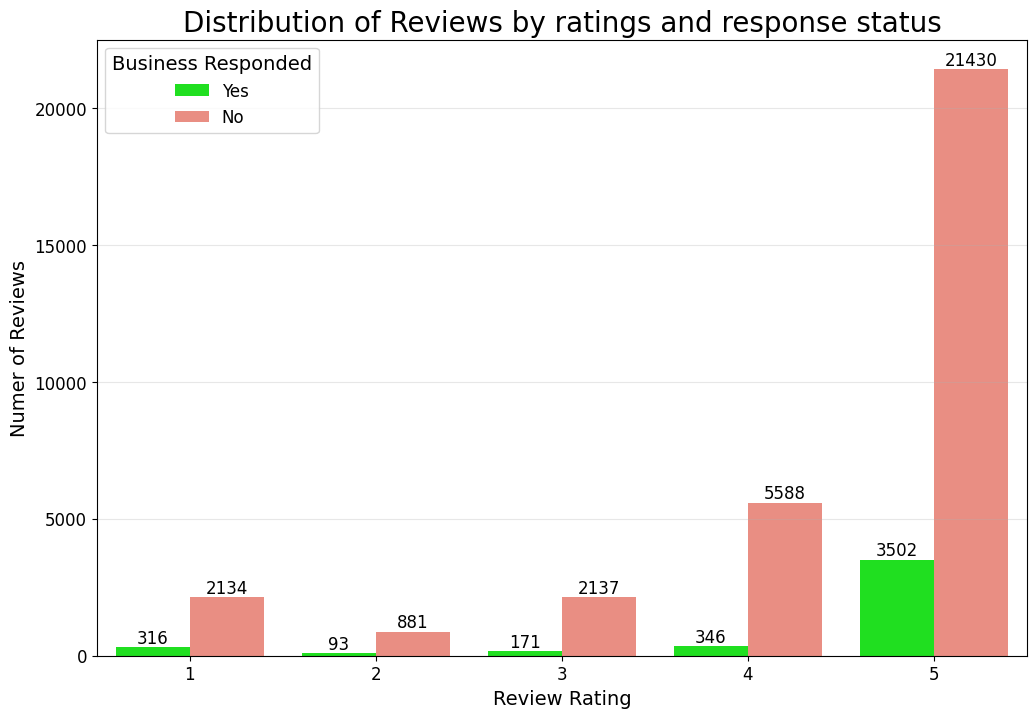

In [453]:
# Generate bar graph for review_rating distribution with response categories
palette = {'Y': 'lime', 'N': 'salmon'} # Colour choice for graph
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=review_df, x='review_rating', palette=palette, hue='if_response')

plt.title('Distribution of Reviews by ratings and response status', fontsize=20)
plt.xlabel('Review Rating', fontsize=14)
plt.xticks(fontsize=12)

plt.ylabel('Numer of Reviews', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(title='Business Responded', title_fontsize=14, labels=['Yes', 'No'], fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

plt.show()


The above figure shows that the overwhelming majority of reviews have a rating of 5. Businesses also reply to 5 star reviews the most, relative to their frequency at a 16.34% response rate. This supports how people tend to instinctively be more responsive to postiive feedback. Furthermore, most reviews tend to be postive (5 or above) with very little negative reviews (2 and below). This is quite surprising as the United States often gains attention globally for large protests and riots, suggesting that either businesses in California have a very high service standard, or consumers have a very low service standard. 

### Business Response depending on if review contains text 

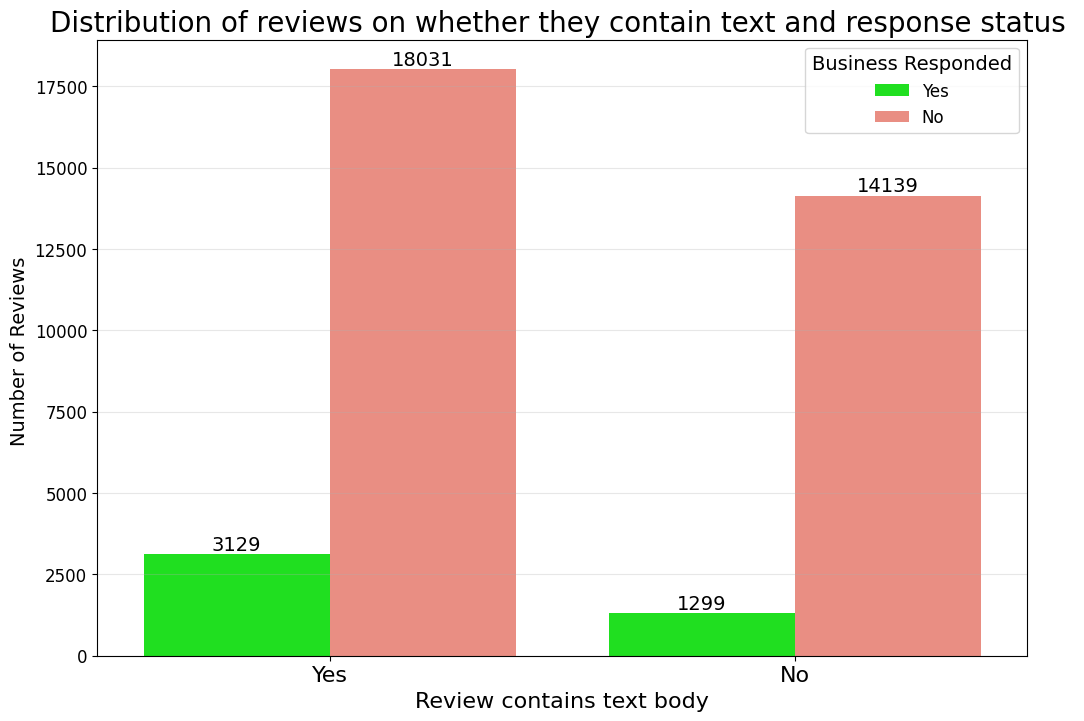

In [454]:
# Add new boolean column to check if review contains text body 
review_df['if_text'] = review_df['review_text'].apply(lambda x: 'Y' if x != 'none' else 'N')
palette = {'Y': 'lime', 'N': 'salmon'}
# Generate bar graph for count of reviews with review text 
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=review_df, x='if_text', hue='if_response', hue_order=['Y', 'N'], palette=palette)

plt.title('Distribution of reviews on whether they contain text and response status ', fontsize=20)

plt.xlabel('Review contains text body', fontsize=16)
plt.xticks(['Y', 'N'], ['Yes', 'No'], fontsize=16)

plt.ylabel('Number of Reviews ', fontsize=14)
plt.yticks(fontsize=12)

plt.legend(title='Business Responded', loc='upper right', labels=['Yes', 'No'], title_fontsize=14, fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fontsize=14)
    
plt.show()


The above figure showcases how businesses are slightly more inclined to respond to a review if they contain actual text. 

In [455]:
# Aggregating reviews based on business 
aggregated_review_df = review_df.groupby('gmap_id').agg(
    review_count=('gmap_id', 'size'),
    user_count = ('user_id', 'size'),
    time_count = ('time', 'median'),
    avg_rating = ('review_rating', 'mean'),
    review_text_count=('review_text', lambda x: (x != 'none').sum()),
    pic_count = ('if_pic', lambda x: (x == 'Y').sum()),
    response_count=('if_response', lambda x: (x == 'Y').sum()),

)

### Rating distribution across businesses 

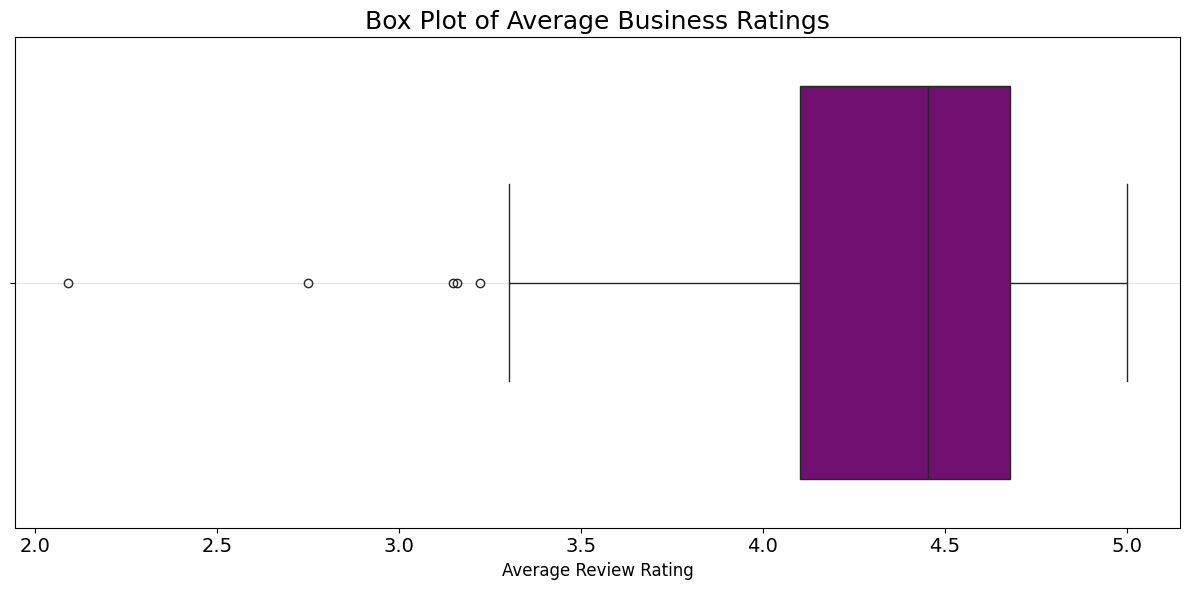

In [456]:
plt.figure(figsize=(12, 6))
# Boxplot for avg review ratings 
sns.boxplot(data=aggregated_review_df, x='avg_rating', color='purple')
plt.title('Box Plot of Average Business Ratings', fontsize=18)
plt.grid(axis='y', alpha=0.3)
plt.xlabel('Average Review Rating', fontsize=12)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

The above boxplot shows the distribution of business ratings across California. With a median at just below 4.5 and an interquartile range between 4.1 and 4.6, the figure shows how a high business rating on google may not necessarily reflect the quality and standard of the business. It also brings us to question the legitimacy of these reviews, as anyone can leave a review as long as they have a google account. 

<div class="alert alert-block alert-warning">

## 4.  Examining Metadata <a class="anchor" name="examine2"></a>

 </div>

In [457]:
meta_df = pd.read_json(r"meta-California.json", lines=True)

### **Summarise Key Features and Variables:**

- **name**: Name of business 
- **address**: Address of business 
- **description**: Text description of business 
- **latitude**: Position vertically on Earth
- **longitude**: Position horizontally on Earth
- **category**: Category of business (can have multiple categories as a list)
- **avg_rating**: Average rating of business 
- **num_of_reviews**: Number of reviews 
- **price**: General price/spending indicator for business - Categorical 
- **hours**: Contains list of time ranges when business is open
- **MISC**: Contains miscelleanous tags that apply to business in an indented list format.  
- **state**: State of business 
- **relative-results**: We assumed this was similar businesses that were flagged as similar by Google 
- **url**: url of google maps link



In [458]:
meta_df.shape

(515961, 15)

In [459]:
meta_df.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,515961.000000,515961.000000,515961.000000,515961.000000
mean,35.538558,-119.412233,4.278333,136.696334
std,2.137430,3.410867,0.627410,375.423986
min,21.881041,-140.173392,1.000000,1.000000
25%,33.897430,-121.574379,4.000000,8.000000
50%,34.218867,-118.448297,4.400000,33.000000
75%,37.680093,-117.868463,4.700000,108.000000
max,44.393000,180.000000,5.000000,9998.000000


In [460]:
meta_df.dtypes

name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object

In [461]:
meta_df.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')

In [462]:
meta_df.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
1,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Matrix International Textiles,"Matrix International Textiles, 1363 S Bonnie B...",0x80c2cf163db6bc89:0x219484e2edbcfa41,None,34.015505,-118.181839,[Fabric store],3.5,6,None,"[[Thursday, 8:30AM–5:30PM], [Friday, 8:30AM–5:...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 5:30PM,"[0x80c2cf042a5d9561:0xd0024ad6f81f1335, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [463]:
# Check for nulls 
meta_df.isnull().sum()

name                    10
address               7704
gmap_id                  0
description         404040
latitude                 0
longitude                0
category              2376
avg_rating               0
num_of_reviews           0
price               406160
hours               100979
MISC                 82923
state               143713
relative_results     40464
url                      0
dtype: int64

### Dataset Join 

In [464]:
# Merge metadata dataset with task1 dataset 
merged_df = pd.merge(review_df, meta_df, on='gmap_id', how='left')

In [465]:
# Drop redundant/unimportant columns
columns = ['avg_rating', 'num_of_reviews', 'relative_results']
merged_df = merged_df.drop(columns=columns)

In [466]:
merged_df.shape

(36690, 22)

In [467]:
merged_df.head(5)

,gmap_id,user_id,time,review_rating,review_text,if_pic,pic_dim,if_response,year,month,...,address,description,latitude,longitude,category,price,hours,MISC,state,url
0,0x80c2b62d3ad1385f:0x134c0ae51a64e340,111879057746007898782,2019-02-07 18:49:08,4,"my ""expert foodie friends"" have been telling m...",N,[],N,2019,2019-02,...,"Louisiana Red Seafood, 7800 S Western Ave, Los...",None,33.968945,-118.308815,None,None,"[[Sunday, 12–7:30PM], [Monday, 11AM–7:30PM], [...",None,Permanently closed,https://www.google.com/maps/place//data=!4m2!3...
1,0x80c2b62d3ad1385f:0x134c0ae51a64e340,101905598065020101585,2018-09-20 20:07:00,4,beautiful atmosphere. great food and amazing s...,N,[],N,2018,2018-09,...,"Louisiana Red Seafood, 7800 S Western Ave, Los...",None,33.968945,-118.308815,None,None,"[[Sunday, 12–7:30PM], [Monday, 11AM–7:30PM], [...",None,Permanently closed,https://www.google.com/maps/place//data=!4m2!3...
2,0x80c2b62d3ad1385f:0x134c0ae51a64e340,107641378831752487602,2019-01-20 06:51:19,4,love how hidden this joint was in downtown los...,N,[],N,2019,2019-01,...,"Louisiana Red Seafood, 7800 S Western Ave, Los...",None,33.968945,-118.308815,None,None,"[[Sunday, 12–7:30PM], [Monday, 11AM–7:30PM], [...",None,Permanently closed,https://www.google.com/maps/place//data=!4m2!3...
3,0x80c2b62d3ad1385f:0x134c0ae51a64e340,106296655996491216483,2019-01-21 06:14:42,5,one of my favorite spots for delicious seafood...,N,[],N,2019,2019-01,...,"Louisiana Red Seafood, 7800 S Western Ave, Los...",None,33.968945,-118.308815,None,None,"[[Sunday, 12–7:30PM], [Monday, 11AM–7:30PM], [...",None,Permanently closed,https://www.google.com/maps/place//data=!4m2!3...
4,0x80c2b62d3ad1385f:0x134c0ae51a64e340,114797512876374566333,2019-02-12 00:16:22,5,seafood and the atmosphere here is quality. fo...,N,[],N,2019,2019-02,...,"Louisiana Red Seafood, 7800 S Western Ave, Los...",None,33.968945,-118.308815,None,None,"[[Sunday, 12–7:30PM], [Monday, 11AM–7:30PM], [...",None,Permanently closed,https://www.google.com/maps/place//data=!4m2!3...


In [468]:
# Final null value check 
merged_df.isnull().sum()

gmap_id              0
user_id              0
time                 0
review_rating        0
review_text         23
if_pic               0
pic_dim              0
if_response          0
year                 0
month                0
if_text              0
name                 0
address            476
description      18228
latitude             0
longitude            0
category            68
price            19516
hours             1738
MISC              1825
state             1738
url                  0
dtype: int64

<div class="alert alert-block alert-warning">

## 5.  Data Analysis <a class="anchor" name="DA"></a>

 </div>

 In this section, we are looking into 5 data insights from the data. We believe that by looking into different factors that can impact a business rating, we can have a better understanding on the importance of business tags, pricing, location, as well as key factors to consider  when it comes to delivering a successful service which leaves customers inclined to leave a positive review.

 

## Which MISC tags are most desirable 

In [469]:
merged_df['MISC']

0                                                     None
1                                                     None
2                                                     None
3                                                     None
4                                                     None
                               ...                        
36685    {'Service options': ['No-contact delivery', 'D...
36686    {'Service options': ['No-contact delivery', 'D...
36687    {'Service options': ['No-contact delivery', 'D...
36688    {'Service options': ['No-contact delivery', 'D...
36689    {'Service options': ['No-contact delivery', 'D...
Name: MISC, Length: 36690, dtype: object

In [470]:
# Change column to dict type 
def convert_to_dict(row):
    # Convert to empty dict if 'None' 
    if row is None or row =='None':
        return {}
    else:
        return row

merged_df['transformed_MISC'] = merged_df['MISC'].apply(convert_to_dict)


In [471]:
merged_df['transformed_MISC']

0                                                       {}
1                                                       {}
2                                                       {}
3                                                       {}
4                                                       {}
                               ...                        
36685    {'Service options': ['No-contact delivery', 'D...
36686    {'Service options': ['No-contact delivery', 'D...
36687    {'Service options': ['No-contact delivery', 'D...
36688    {'Service options': ['No-contact delivery', 'D...
36689    {'Service options': ['No-contact delivery', 'D...
Name: transformed_MISC, Length: 36690, dtype: object

In [472]:
# Function to extract MISC tags and encode them into new boolean attributes 
def extract_misc(misc_dict):
    flattened = {}
    for key, values in misc_dict.items():
        for value in values:
            flattened[f'{key}: {value}'] = 1
    return flattened

# Generate new dataframe with MISC tag encodings 
misc_encodings = merged_df['transformed_MISC'].apply(lambda x: pd.Series(extract_misc(x)))

# Fill NaN values with 0
misc_encodings = misc_encodings.fillna(0)

print(misc_encodings)

# Combine with original DataFrame
merged_df_combined = pd.concat([merged_df, misc_encodings], axis=1)
merged_df_combined = merged_df_combined.drop(columns='transformed_MISC')

merged_df_combined.head()

       Accessibility: Wheelchair accessible entrance  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
36685                                            1.0   
36686                                            1.0   
36687                                            1.0   
36688                                            1.0   
36689                                            1.0   

       Planning: Appointments recommended  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
36685       

,gmap_id,user_id,time,review_rating,review_text,if_pic,pic_dim,if_response,year,month,...,Amenities: Toilets,Crowd: Family friendly,Crowd: University students,Service options: Same-day delivery,Offerings: Service guarantee,Atmosphere: Cosy,Highlights: Play area,From the business: Identifies as veteran-led,Health and safety: Staff wear masks,Amenities: Public restroom
0,0x80c2b62d3ad1385f:0x134c0ae51a64e340,111879057746007898782,2019-02-07 18:49:08,4,"my ""expert foodie friends"" have been telling m...",N,[],N,2019,2019-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0x80c2b62d3ad1385f:0x134c0ae51a64e340,101905598065020101585,2018-09-20 20:07:00,4,beautiful atmosphere. great food and amazing s...,N,[],N,2018,2018-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0x80c2b62d3ad1385f:0x134c0ae51a64e340,107641378831752487602,2019-01-20 06:51:19,4,love how hidden this joint was in downtown los...,N,[],N,2019,2019-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0x80c2b62d3ad1385f:0x134c0ae51a64e340,106296655996491216483,2019-01-21 06:14:42,5,one of my favorite spots for delicious seafood...,N,[],N,2019,2019-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0x80c2b62d3ad1385f:0x134c0ae51a64e340,114797512876374566333,2019-02-12 00:16:22,5,seafood and the atmosphere here is quality. fo...,N,[],N,2019,2019-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [473]:

# New Dataframe to store average ratings for each tag 
tag_ratings = pd.DataFrame(columns=['tag', 'average_rating'])

# Aggregate based on tag 
tags = misc_encodings.columns
# Calculate the average review rating for each tag effect
for tag in tags:
    # Aggregate by tag and calculate average rating 
    avg_review = merged_df_combined.groupby(tag).agg(average_rating=('review_rating', 'mean'),
                                                     count_reviews=(tag, 'size')).reset_index()
    #print(avg_review)

    # We only want average rating for reviews with tag included 
    avg_review = avg_review[avg_review[tag]==1].drop(columns=[tag])
    #print(avg_review)
    
    # Append the results to the new Dataframe 
    tag_ratings = pd.concat([tag_ratings, pd.DataFrame({'tag': tag, 
                                                        'average_rating':avg_review['average_rating'], 
                                                        'reviews': avg_review['count_reviews']})], 
                            ignore_index=True)

print(tag_ratings.head())


                                             tag  average_rating  reviews
0  Accessibility: Wheelchair accessible entrance        4.311262  24542.0
1             Planning: Appointments recommended        4.695009   2705.0
2     From the business: Identifies as women-led        4.511158    941.0
3             Service options: In-store shopping        4.401548   6074.0
4                 Health & safety: Mask required        4.366515   9915.0


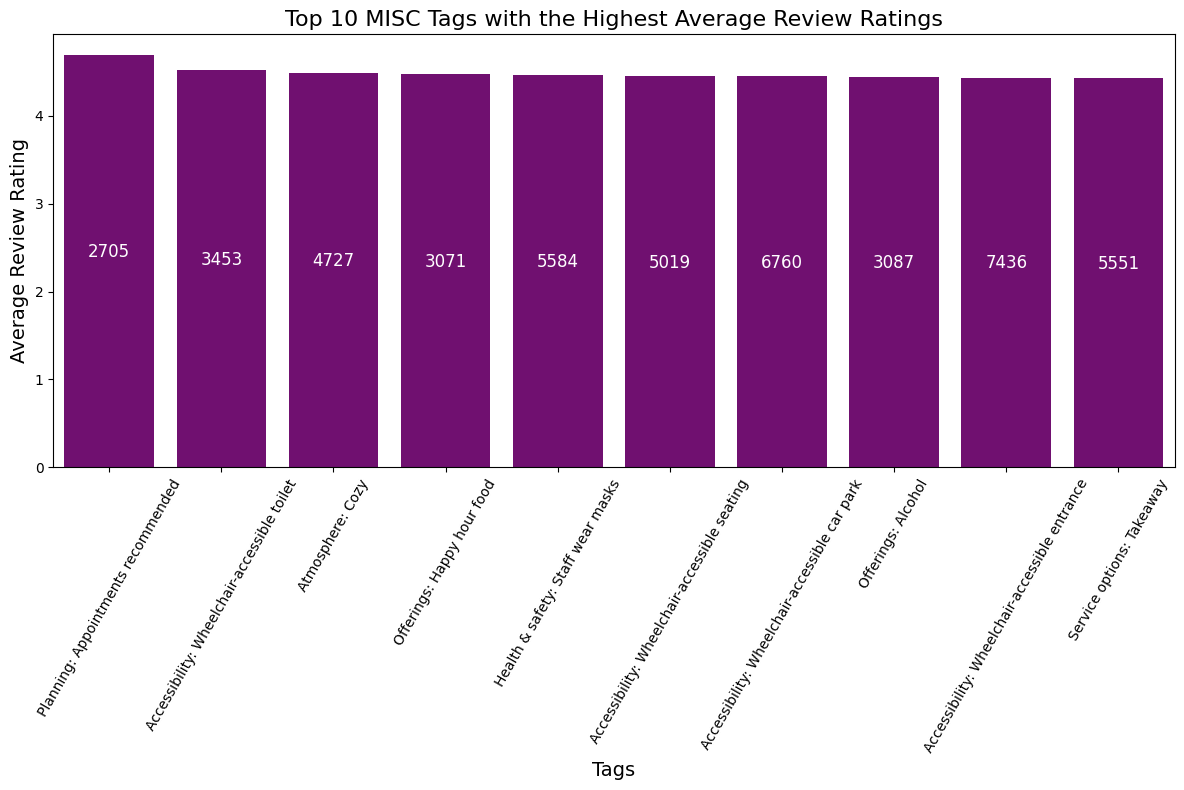

In [474]:
# Filter tags that have at least appeared a significant amount of times  
median = tag_ratings['reviews'].median()
tag_ratings = tag_ratings[tag_ratings['reviews'] > median]
# Sort on rating 
tag_ratings = tag_ratings.sort_values(by='average_rating', ascending=False)

# filter top 10 tags 
top_10 = tag_ratings.head(10)

# Set the plot size
plt.figure(figsize=(12, 8))

# Bar Chart 
ax = sns.barplot(data=top_10, x='tag', y='average_rating', color='purple')
plt.title('Top 10 MISC Tags with the Highest Average Review Ratings', fontsize=16)
plt.xlabel('Tags', fontsize=14)
plt.xticks(rotation=60, fontsize=10)
plt.ylabel('Average Review Rating', fontsize=14)
plt.yticks(fontsize=10)
# Add labels on bars
for i, bar in enumerate(ax.patches):
    x_pos = bar.get_x() + bar.get_width() / 2
    y_pos = bar.get_height()/2
    reviews = top_10.iloc[i]['reviews']
    
    ax.text(
        x_pos, 
        y_pos, 
        f'{int(reviews)}', 
        ha='center', 
        va='bottom', 
        fontsize=12,
        color='white'
    )
    
plt.tight_layout()
plt.show()


The above graph showcases the most postively received miscellaneous tags associated with Californian businesses. The results highlight the importance of accessibility, as well as businesses following strict health & safety protocols as desirable traits for customers in California. This also makes sense considering a significant proportion of reviews were created during the covid pandemic. There also seems to be a postive correlation between businesses that recommend appointments with higher ratings. This could suggest that there is a communal sentiment that businesses which operate based on appointments will usually result in a better experience overall. New business pursuers should aim to accomodate similar aspects to the above. 

## Location

In [508]:
# Aggregate based on business
aggregated_df = merged_df.groupby(['gmap_id', 'latitude', 'longitude', 'name']).agg(average_rating=('review_rating', 'mean'),
                                                                                    count_reviews=('gmap_id', 'size')).reset_index()

# Create a map which starts at average position from reviews 
map_center = [aggregated_df['latitude'].mean(), aggregated_df['longitude'].mean()]
business_map = folium.Map(location=map_center, zoom_start=6.5, tiles='cartodbpositron')

# Generate a continuous colour scale 
colormap = linear.YlGnBu_09.scale(aggregated_df['average_rating'].min(), aggregated_df['average_rating'].max())

# Plot points 
for column, row in aggregated_df.iterrows(): 
    color = colormap(row['average_rating']) # Generate colour corresponding to average rating 
    radius = max(2, min(12, row['count_reviews'] ** 0.5)) # Generate corresponding radius depending on number of reviews 
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius, 
        color=color,
        fill=True,
        # Include popup for additional information 
        popup=(
            f"Gmap ID: {row['gmap_id']}<br>"
            f"Business: {row['name']}<br>"
            f"Average Rating: {row['average_rating']:.1f}<br>"
            f"Number of Reviews: {row['count_reviews']}"
        )
    ).add_to(business_map)

# Add legend 
colormap.caption = 'Average Rating'
colormap.add_to(business_map)


business_map

The above map visualisation showcases the distribution of businesses location wise from our dataset. The majority of businesses are concentrated in two locations: San Francisco and Los Angeles. Once again, assuming that our dataset is a subset reflective of the overall state, we can conclude that San Francisco and Los Angeles are two major cities in the state of California. There does not appear to be any clear correlation between rating and location. 

In [507]:

LA_position = [34.0522, -118.2437]
# Create a map which starts at average position from reviews 
map_center = [LA_position[0], LA_position[1]]
business_map = folium.Map(location=map_center, zoom_start=9, tiles='cartodbpositron')

# Generate a continuous colour scale 
colormap = linear.YlGnBu_09.scale(aggregated_df['average_rating'].min(), aggregated_df['average_rating'].max())

# Plot points 
for column, row in aggregated_df.iterrows():
    color = colormap(row['average_rating'])
    radius = max(2, min(15, row['count_reviews'] ** 0.5))
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius, 
        color=color,
        fill=True,

        popup=(
            f"Gmap ID: {row['gmap_id']}<br>"
            f"Business: {row['name']}<br>"
            f"Average Rating: {row['average_rating']:.1f}<br>"
            f"Number of Reviews: {row['count_reviews']}"
        )
    ).add_to(business_map)

# Add legend 
colormap.caption = 'Average Rating'
colormap.add_to(business_map)


business_map

The above map provides a close visaulisation of Los Angeles in particular as it contains the majority of businesses in our dataset. Once again, there does not appear to be any huge patterns in business rating. However, it is clear from this map that not all businesses are included in our dataset. Businesses in the City also don't have significantly more reviews that businesses in surrounding suburbs. This shows that it is not necessary to operate a business from Los Angeles or San Francisco CBD to generate traffic on google reviews. 

## Price Analysis 

In [ ]:
merged_df["price"].unique()

array([None, '$$', '$', '₩₩', '$$$', '₩'], dtype=object)

C:\Users\micha\AppData\Local\Temp\ipykernel_23152\2051997048.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aggregated_df, y='average_review', x='price_indicator', palette='viridis')


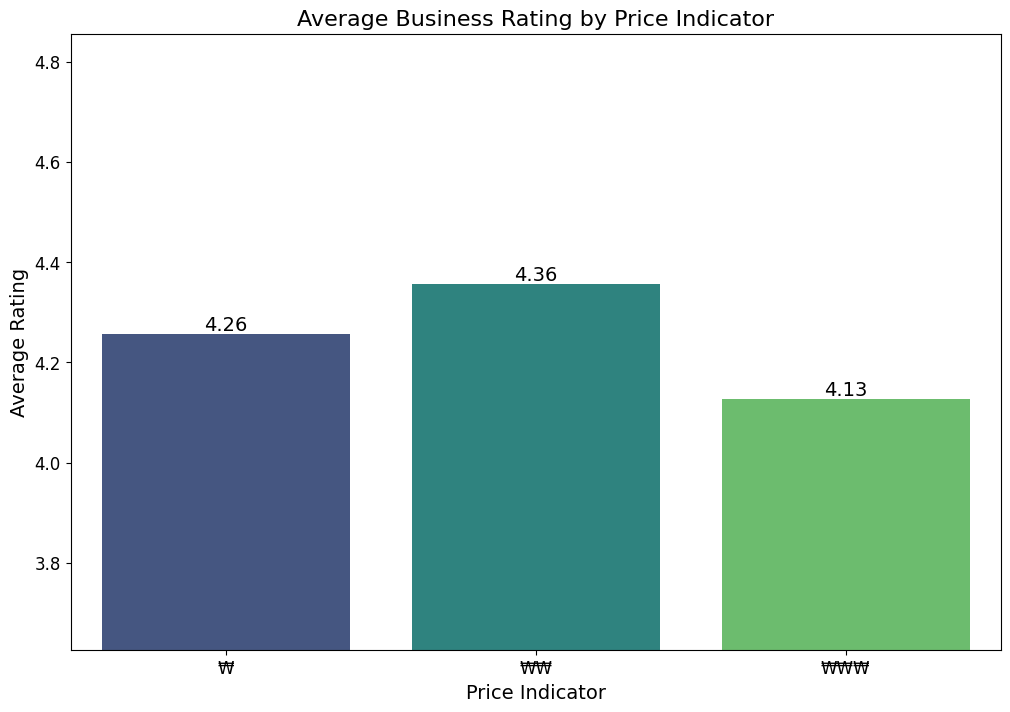

In [521]:
def encode_price(price): # Label Encoding Price 
    encoding_map = {
        '₩': 1,  # We assume here that '₩' is equivalent to '$'
        '₩₩': 2,
        '$': 1,
        '$$': 2,
        '$$$': 3
    }
    return encoding_map.get(price, np.nan)  

# Aggregate based on price 
merged_df['encoded_price'] = merged_df['price'].apply(encode_price)
aggregated_df = merged_df.groupby(['encoded_price']).agg(
    count_price=('encoded_price', 'size'),
    average_review=('review_rating', 'mean')
).reset_index()

# Inverse mapping for price indiactor 
inverse_encoding_map = {1: r'₩', 2: r'₩₩', 3: r'₩₩₩'} # '$' has parsing conflicts matplotlib 
aggregated_df['price_indicator'] = aggregated_df['encoded_price'].map(inverse_encoding_map)


plt.figure(figsize=(12, 8))
# Generate Bar Chart 
sns.barplot(data=aggregated_df, y='average_review', x='price_indicator', palette='viridis')

# Add labels on bars correctly aligned
for index, row in aggregated_df.iterrows():
    plt.text(x=index, y=row['average_review'], s=f'{row["average_review"]:.2f}', 
             va='bottom', ha='center', fontsize=14)
    
# Scale y Axis 
plt.ylim(aggregated_df['average_review'].min() - 0.5, aggregated_df['average_review'].max() + 0.5)

# Customize the plot
plt.title('Average Business Rating by Price Indicator', fontsize=16)
plt.xlabel('Price Indicator', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Average Rating', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

The above graph suggests that people in California or visiting California tend to have a higher preference for restaurants and shops that offer high value to costs ratios. This is evident by the triple dollar sign businesses having the lowest average rating at just 4.13. This indicates that it may be beneficial to consider developing a value-for-money business model that focuses on providing customers with maximum value at minimum cost if starting a business in California. 

## Category 

In [ ]:
# Reinitialising merged_df to remove unwanted columns 
merged_df = pd.merge(review_df, meta_df, on='gmap_id', how='left')
columns = ['avg_rating', 'num_of_reviews', 'state', 'relative_results']
merged_df = merged_df.drop(columns=columns)

In [522]:
merged_df['category']

0                                                     None
1                                                     None
2                                                     None
3                                                     None
4                                                     None
                               ...                        
36685    [Fast food restaurant, Breakfast restaurant, C...
36686    [Fast food restaurant, Breakfast restaurant, C...
36687    [Fast food restaurant, Breakfast restaurant, C...
36688    [Fast food restaurant, Breakfast restaurant, C...
36689    [Fast food restaurant, Breakfast restaurant, C...
Name: category, Length: 36690, dtype: object

In [523]:
# Extracts categories from rows 
categories = [category for sublist in merged_df['category'].dropna() for category in sublist]
#print(categories)
# Create Series to count categories 
category_counts = pd.Series(categories).value_counts()
print(category_counts)

Restaurant                   5507
Fast food restaurant         4446
Breakfast restaurant         3892
Mexican restaurant           3675
Chicken restaurant           2860
                             ... 
Temp agency                    53
Recruiter                      53
Employment search service      53
Employment center              53
Employment agency              53
Name: count, Length: 298, dtype: int64


In [531]:
# Create a dictionary containing category counts
category_count_dict = category_counts.to_dict()

# Define a function to replace categories with the most frequent one
def assign_most_frequent_category(categories):
    if not categories:
        return None
    if len(categories) == 1:
        return categories[0]
    # Find the most frequently appearing category
    sorted_categories = sorted(categories, key=lambda x: category_count_dict.get(x, 0), reverse=True)
    #print(sorted_categories)
    return sorted_categories[0]

# Transform category to most frequent category
merged_df['most_frequent_category'] = merged_df['category'].apply(lambda x: assign_most_frequent_category(x))


C:\Users\micha\AppData\Local\Temp\ipykernel_23152\2203275434.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined, y='most_frequent_category', x='average_review', palette=colors)


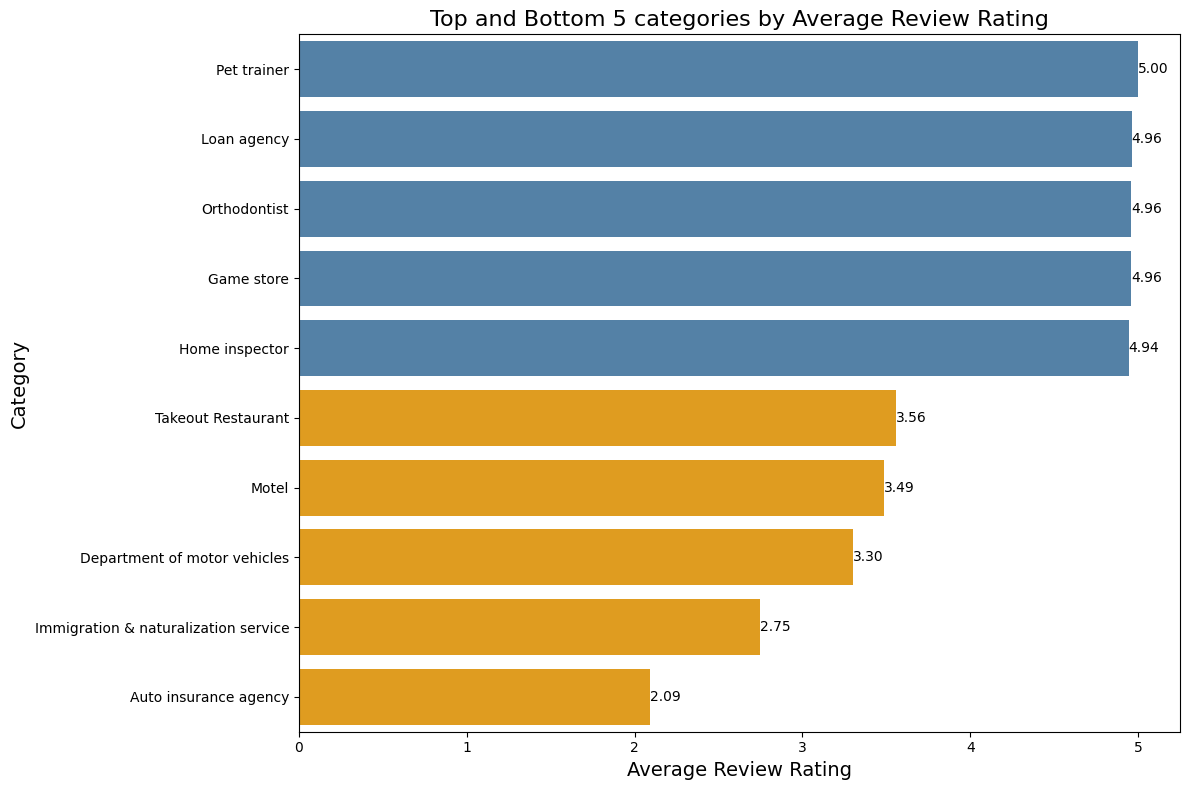

In [538]:
# Aggregate data based on new category 
aggregated_df = merged_df.groupby(['most_frequent_category']).agg(
    count=('most_frequent_category', 'size'),
    average_review=('review_rating', 'mean')
).reset_index()

# Sort and filter
aggregated_df = aggregated_df.sort_values(by='average_review', ascending=False)
top_5 = aggregated_df.head(5)
bottom_5 = aggregated_df.tail(5)
combined = pd.concat([top_5, bottom_5])

# Define color code
colors = ['steelblue'] * 5 + ['orange'] * 5  # Blue for top 5, Orange for bottom 5


plt.figure(figsize=(12, 8))
# Generate bar chart 
sns.barplot(data=combined, y='most_frequent_category', x='average_review', palette=colors)

# Add labels
for index, value in enumerate(combined['average_review']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10, color='black')

plt.title('Top and Bottom 5 categories by Average Review Rating', fontsize=16)
plt.xlabel('Average Review Rating', fontsize=14)
plt.ylabel('Category', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
len(merged_df['transformed_category'].unique())



105

### Count Vectoriser 

In [ ]:
# Reinitialise aggregated dataframe 
aggregated_review_df = review_df.groupby('gmap_id').agg(
    review_count=('gmap_id', 'size'),
    user_count = ('user_id', 'size'),
    time_count = ('time', 'median'),
    avg_rating = ('review_rating', 'mean'),
    review_text_count=('review_text', lambda x: (x != 'none').sum()),
    pic_count = ('if_pic', lambda x: (x == 'Y').sum()),
    response_count=('if_response', lambda x: (x == 'Y').sum()),

)

# Read the countvec_test.txt file
with open('countvec_test.txt', 'r') as file:
    count_vec_data = file.readlines()
# Convert to Dataframe 
count_vec_df = pd.DataFrame([line.strip().split() for line in count_vec_data])
count_vec_df.rename(columns ={0: 'gmap_id'}, inplace=True)

print(count_vec_df.head())


                                 gmap_id         1        2        3        4  \
0  0x54cde72868493ca5:0x3bed623bec4c43e3  1408:44,   305:4,   211:3,   326:1,   
1  0x808327b71461d6bb:0x7e1165558a98f648    677:2,  2003:1,   542:5,   635:2,   
2  0x8083ff64283d3aab:0x278c940d94dac24d    677:6,  2003:2,   635:1,   470:5,   
3  0x8084481ecb286ce3:0x9621a5cee38c4ec2    677:4,  2003:1,   542:1,   635:2,   
4   0x80844820b85359e3:0xff414747a10c915    677:6,  2003:2,  542:11,  635:27,   

         5        6         7         8         9  ...  1261  1262  1263  \
0   677:1,  2003:2,    542:4,    591:1,   1655:5,  ...  None  None  None   
1   470:7,  2101:2,    726:2,    613:4,  1145:29,  ...  None  None  None   
2  2181:1,  2101:4,  1332:10,    726:3,  1145:15,  ...  None  None  None   
3   470:3,   613:1,   1145:3,    689:6,   1159:1,  ...  None  None  None   
4   470:6,  2181:1,  2101:13,  1323:12,   1332:1,  ...  None  None  None   

   1264  1265  1266  1267  1268  1269  1270  
0  None  N

In [ ]:
# Merge Dataframes
combined_vec_df = pd.merge(count_vec_df, aggregated_review_df, on='gmap_id', how='left')
combined_vec_df.head()

,gmap_id,1,2,3,4,5,6,7,8,9,...,1268,1269,1270,review_count,user_count,time_count,avg_rating,review_text_count,pic_count,response_count
0,0x54cde72868493ca5:0x3bed623bec4c43e3,"1408:44,","305:4,","211:3,","326:1,","677:1,","2003:2,","542:4,","591:1,","1655:5,",...,None,None,None,128,128,2019-01-28 04:49:09.500,4.148438,72,0,0
1,0x808327b71461d6bb:0x7e1165558a98f648,"677:2,","2003:1,","542:5,","635:2,","470:7,","2101:2,","726:2,","613:4,","1145:29,",...,None,None,None,197,197,2019-04-12 11:14:22.000,4.710660,146,7,8
2,0x8083ff64283d3aab:0x278c940d94dac24d,"677:6,","2003:2,","635:1,","470:5,","2181:1,","2101:4,","1332:10,","726:3,","1145:15,",...,None,None,None,213,213,2018-07-20 14:01:03.000,4.615023,137,4,2
3,0x8084481ecb286ce3:0x9621a5cee38c4ec2,"677:4,","2003:1,","542:1,","635:2,","470:3,","613:1,","1145:3,","689:6,","1159:1,",...,None,None,None,75,75,2019-09-03 14:53:21.000,4.600000,42,0,39
4,0x80844820b85359e3:0xff414747a10c915,"677:6,","2003:2,","542:11,","635:27,","470:6,","2181:1,","2101:13,","1323:12,","1332:1,",...,None,None,None,434,434,2020-06-14 20:31:23.500,3.301843,279,6,0


C:\Users\micha\AppData\Local\Temp\ipykernel_27024\761900009.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_positive_words, x='word', y='average_rating', palette='viridis')


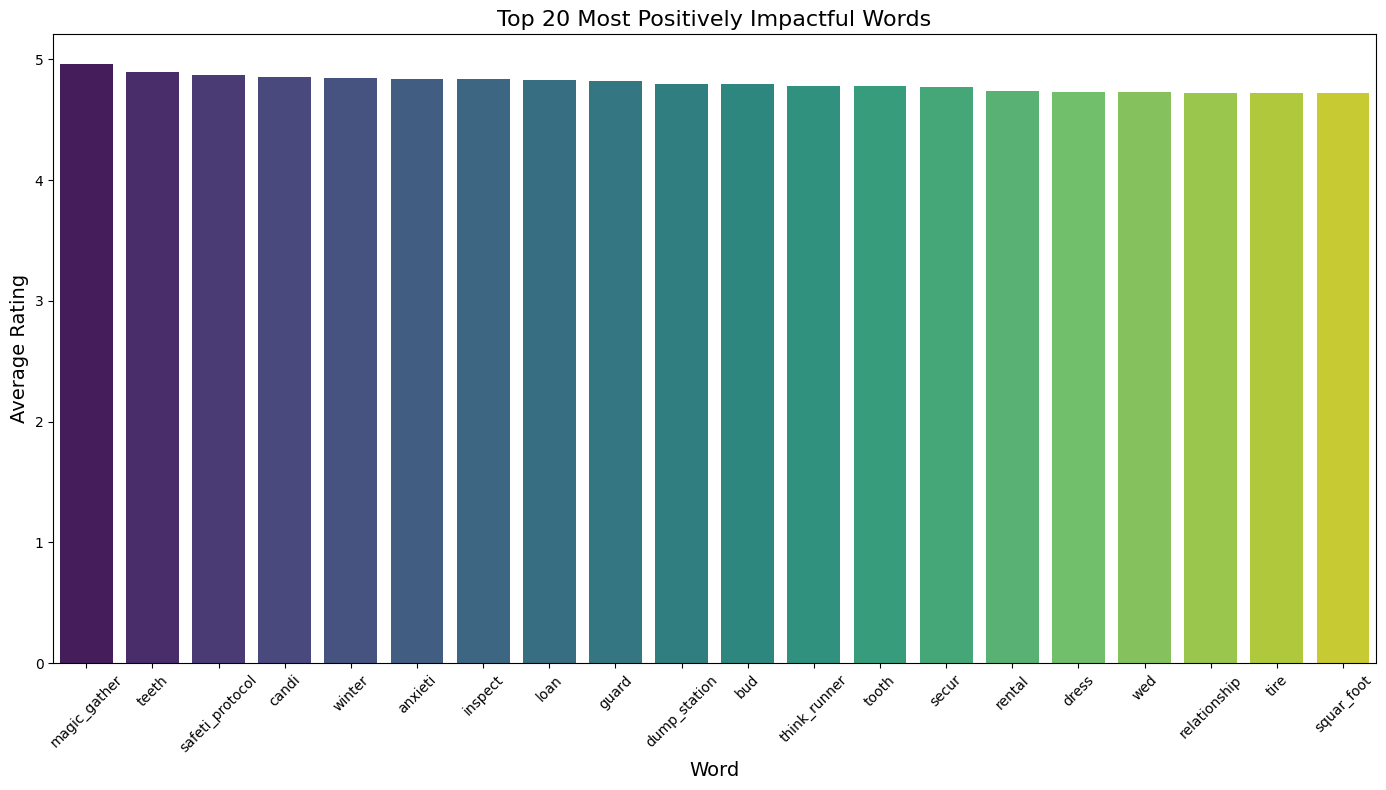

C:\Users\micha\AppData\Local\Temp\ipykernel_27024\761900009.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_negative_words, x='word', y='average_rating', palette='magma')


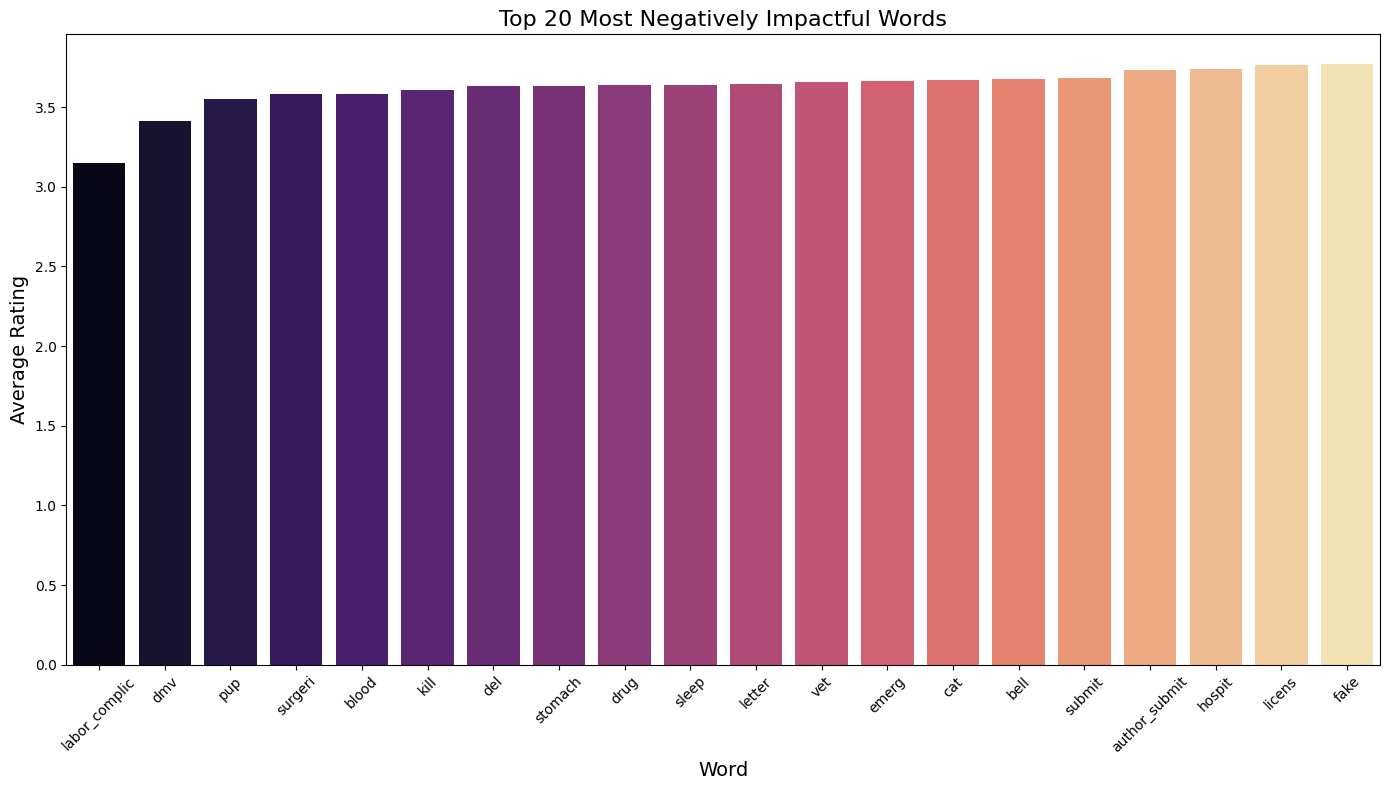

In [ ]:
# Convert vocab list to dictionary 
word_dict = {}
with open('test_vocab.txt', 'r') as file:
    for line in file:
        word, index = line.strip().split(':')
        word_dict[index] = word

# Initialise dictionaries for word counts and ratings 
word_count = defaultdict(int)
word_rating_sum = defaultdict(float)

# Iterate through each row in the DataFrame
for column, row in combined_vec_df.iterrows():
    if pd.notna(row['avg_rating']):
        avg_rating = row['avg_rating']
        
        # Process each word count column
        for col in combined_vec_df.columns[1:]:
            value = str(row[col])
            if value and value != 'None':
                for wc in value.split(','):
                    # Ensure the word count entry is valid
                    if ':' in wc:
                        index, count = wc.split(':')
                        if count.isdigit():
                            word = word_dict.get(index, f"unknown_{index}") # not sure if we need unknown 
                            word_count[word] += int(count)
                            word_rating_sum[word] += avg_rating * int(count)

# Calculate average ratings for each words
word_avg_rating = {
    word: word_rating_sum[word] / word_count[word]
    for word in word_count
}

# Convert the results into a DataFrame
df_word_ratings = pd.DataFrame(
    list(word_avg_rating.items()), columns=['word', 'average_rating']
)
df_word_ratings['count'] = df_word_ratings['word'].map(word_count)

# Filter for words that appear more than twice
df_word_ratings = df_word_ratings[df_word_ratings['count'] > 2]

# Get the top 20 words with the highest and lowest average ratings
top_positive_words = df_word_ratings.sort_values(by='average_rating', ascending=False).head(20)
top_negative_words = df_word_ratings.sort_values(by='average_rating', ascending=True).head(20)


# Plotting for positive words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_positive_words, x='word', y='average_rating', palette='viridis')
plt.title('Top 20 Most Positively Impactful Words', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting for negative words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_negative_words, x='word', y='average_rating', palette='magma')
plt.title('Top 20 Most Negatively Impactful Words', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
    
### 5.1. How is xxxx related to xxxx? <a class="anchor" name="DI1"></a>

<div class="alert alert-block alert-info">
    
### 5.2. How does xxxxxx impact the rating of a business? <a class="anchor" name="DI1"></a>

<div class="alert alert-block alert-warning">

## 6.  Data Analysis <a class="anchor" name="summary"></a>

 </div>

Based on the analysis above, we investigate questions on:
........
Our findings are:
.......

These findings tell us:
.......

 

<div class="alert alert-block alert-warning"> 

## 7. References <a class="anchor" name="Ref"></a>

</div>